<a href="https://colab.research.google.com/github/yoavdana/computational_physics_ex3/blob/main/EX3_comp_phi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computational physics EX3 
Yoav Dana

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

Integral functions

In [45]:
def simpson(f,a,b):
  h=(b-a)/2
  return h*(f(a)+4*f((b+a)/2)+f(b))/3

def gauss_legan(f,a,b):
  x=[-0.774596669,0,0.774596669] 
  w=[0.5555556,0.8888889,0.5555556]
  G=0
  for i in range(3):
        G += w[i]*f(0.5*(b-a)*x[i]+ 0.5*(b+a))
  return 0.5*(b-a)*G



def fix_segments(f,a,b,eps,integral_type):
  n=2*int(1/(2*eps))+1
  points=np.linspace(a,b,n)
  integral=0
  for i in range(1,n):
      integral+=integral_type(f,points[i-1],points[i])
  return integral

def recursive(f,a,b,eps,integral_type):
  I0=integral_type(f,a,b)
  return recursive_helper(f,a,b,eps,integral_type,I0)


def recursive_helper(f,a,b,eps,integral_type,I0,depth=0):
  m=(b-a)/2
  I1=integral_type(f,a,m)
  I2=integral_type(f,m,b)
  delta=np.abs(I0-(I1+I2))
  if (delta<=eps and depth>=2) or (depth>=50): 
    return I1+I2
  return recursive_helper(f,a,m,eps/2,integral_type,I1,depth+1)+ recursive_helper(f,m,b,eps/2,integral_type,I2,depth+1)
 
   

def f_integral(f,a,b,eps,global_type,integral_type):
  return global_type(f,a,b,eps,integral_type)





integral testing

In [ ]:
def x2(x,i=[0]):
  i[0]+=1
  print(i[0],end=", ")
  return x**2

def x21(x,i=[0]):
  i[0]+=1
  print(i[0],end=", ")
  return x**2

def sin1(x,i=[0]):
  i[0]+=1
  print(i[0],end=", ")
  return 5*x**3-1

def sin2(x,i=[0]):
  i[0]+=1
  print(i[0],end=", ")
  return 5*x**3-1

method=gauss_legan
#
integ=f_integral(sin1,-1,1,0.001,recursive,method)
error=np.abs(integ+2)
print(error)
method=simpson
integ=f_integral(sin2,-1,1,0.1,recursive,method)
error=np.abs(integ+2)
print(error)


the analitycal functions are x^2 ,x^3 and sin(x).the following tables shows the differens in the different methods: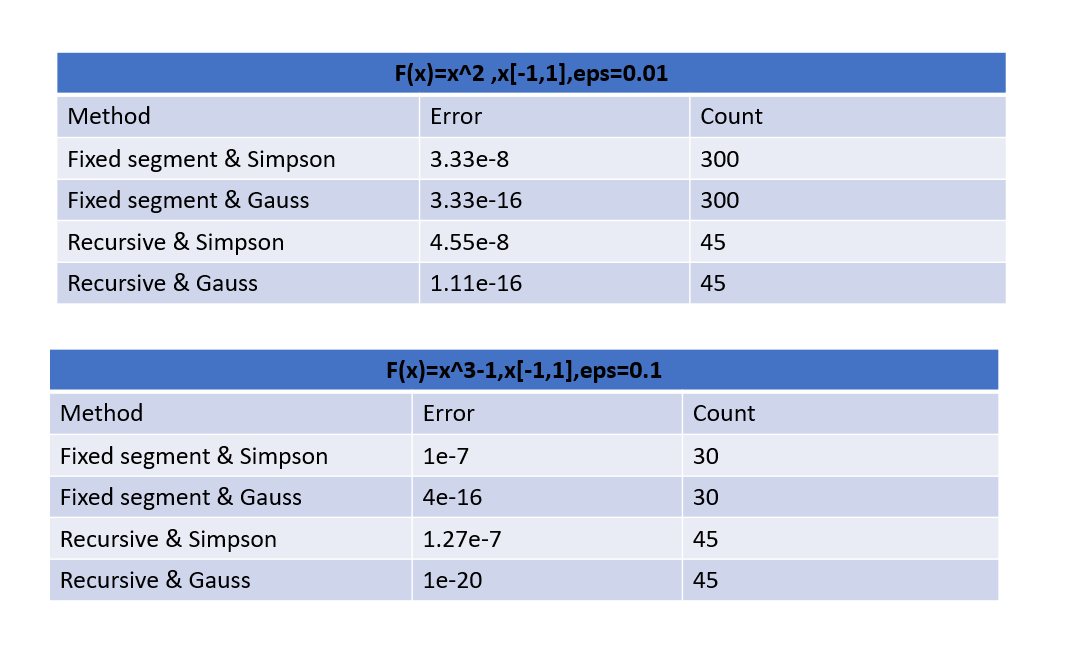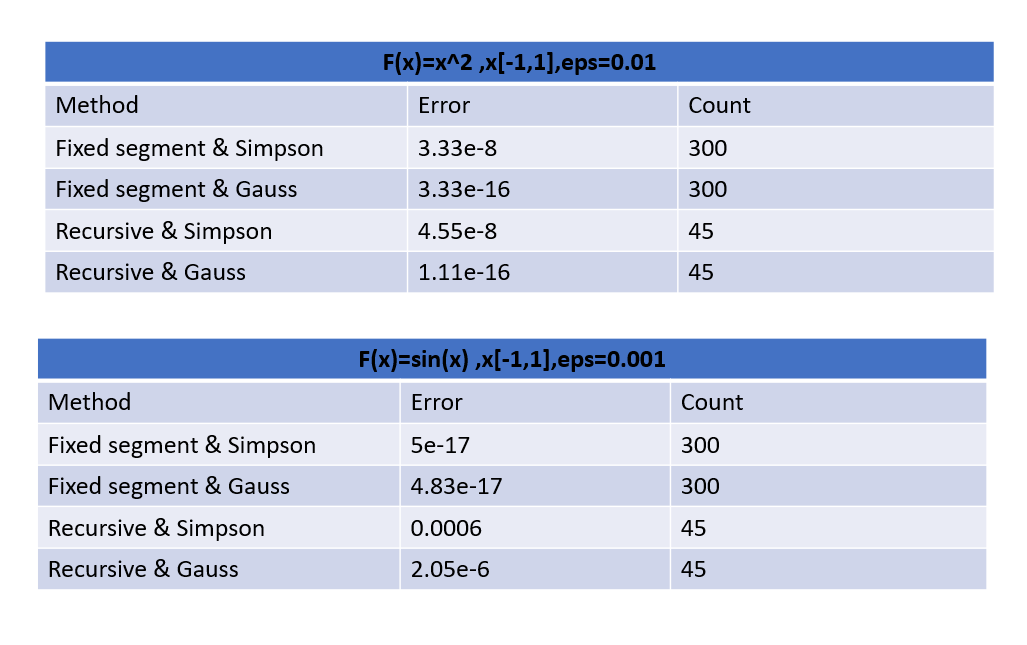


we notice the recursive method has better accuracy with less iterations for all polynomial cases.in the case of sin function the fixed segment method has better accuracy.we also notice that the gauss method in more accurate than the simpson method as expected from what we sow in class.

Root functions

In [3]:



def bisection(f,a,b,epsf,epsx):

    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    m_n=b
    count=0
    while np.abs(f(m_n))>epsf and np.abs(a-b)>epsx:
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        count+=1
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    print(count)
    return (a_n + b_n)/2



def secant(f,a,b,epsx,epsf):

    
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    m_n=a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
    count=0
    while np.abs(f(m_n))>epsf and np.abs(a-b)>epsx:
        count+=1
        f_app=(b_n - a_n)/(f(b_n) - f(a_n))
      
        if f(a_n)*f_app<=0.9*np.abs(a_n-b_n):
          
            m_n = a_n - f(a_n)*f_app
        else:
            m_n=(a_n+b_n)/2
      
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    print(count)
    return  a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))




def x_root(f,a,b,epsx,epsf,type):
  return type(f,a,b,epsx,epsf)




root test

In [4]:
def fr(x):
  return x**3 - x**2 - 1
r=x_root(fr,1,2,0.0002,0.0002,secant)
r1=x_root(fr,1,2,0.0002,0.0002,bisection)
print(np.abs(r-1.4655712311394433))
print(np.abs(r1-1.4655712311394433))


NameError: ignored